In [1]:
import torch
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Linear classification

## Creating dataset

In [2]:
n_pts=100
centers=[[-0.5,0.5],[0.5,-0.5]]
x,y = datasets.make_blobs(n_samples= n_pts, random_state=123,centers=centers,cluster_std=0.4)
x_data = torch.Tensor(x)
y_data = torch.Tensor(y)


In [3]:
def scatter_plot():
  plt.scatter(x[y==0, 0],x[y==0,1])
  plt.scatter(x[y==1, 0],x[y==1,1])

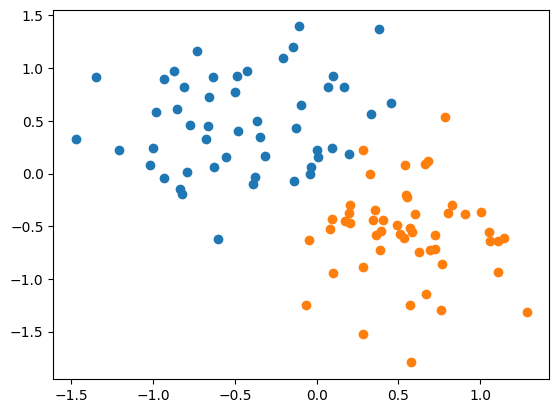

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
  def __init__(self,input_size, output_size):
    super().__init__()
    self.linear=nn.Linear(input_size, output_size)

  def forward(self,x):
    y_pred=torch.sigmoid(self.linear(x))
    return y_pred
  def predict(self,x):
    pred=self.forward(x)
    if pred >=0.5:
      return 1
    else:
      return 0


In [6]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
w,b=model.parameters()
w1,w2=w.view(2)

In [8]:
w2.item()

-0.1682732254266739

In [9]:
def get_paramns():
  return(w1.item(),w2.item(),b[0].item())

In [10]:
def plot_fit(title):
  plt.title = title
  w1,w2,b1 = get_paramns()
  x1 = np.array([-2.0,2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1,x2,'r')
  scatter_plot()

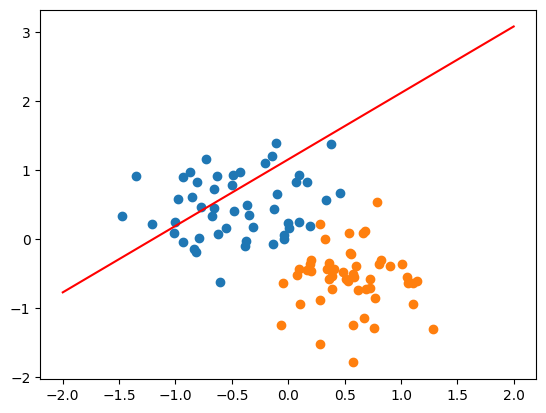

In [11]:
plot_fit('inicial_model')


In [12]:

criterion = nn.BCELoss()
optmizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [13]:

epochs=30000
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_data)
  y_pred=y_pred.squeeze()
  loss=criterion(y_pred,y_data)
  print('epochs:',i,'loss: ', loss.item())
  losses.append(loss.item())
  optmizer.zero_grad()
  loss.backward()
  optmizer.step()

epochs: 0 loss:  0.6185115575790405
epochs: 1 loss:  0.617464005947113
epochs: 2 loss:  0.6164200305938721
epochs: 3 loss:  0.6153795123100281
epochs: 4 loss:  0.6143423318862915
epochs: 5 loss:  0.6133086681365967
epochs: 6 loss:  0.612278401851654
epochs: 7 loss:  0.6112515330314636
epochs: 8 loss:  0.6102280020713806
epochs: 9 loss:  0.6092078685760498
epochs: 10 loss:  0.6081911325454712
epochs: 11 loss:  0.607177734375
epochs: 12 loss:  0.6061676740646362
epochs: 13 loss:  0.6051609516143799
epochs: 14 loss:  0.6041575074195862
epochs: 15 loss:  0.6031573414802551
epochs: 16 loss:  0.6021605730056763
epochs: 17 loss:  0.6011670231819153
epochs: 18 loss:  0.6001767516136169
epochs: 19 loss:  0.5991896986961365
epochs: 20 loss:  0.5982059240341187
epochs: 21 loss:  0.5972253680229187
epochs: 22 loss:  0.5962480306625366
epochs: 23 loss:  0.5952739119529724
epochs: 24 loss:  0.5943029522895813
epochs: 25 loss:  0.5933352112770081
epochs: 26 loss:  0.5923705697059631
epochs: 27 loss: 

Text(0.5, 0, 'epoch')

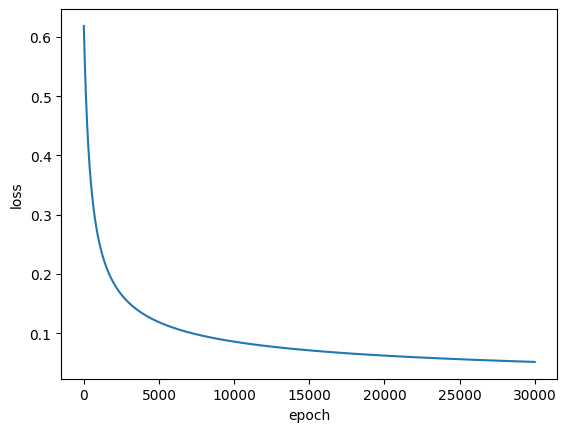

In [14]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')


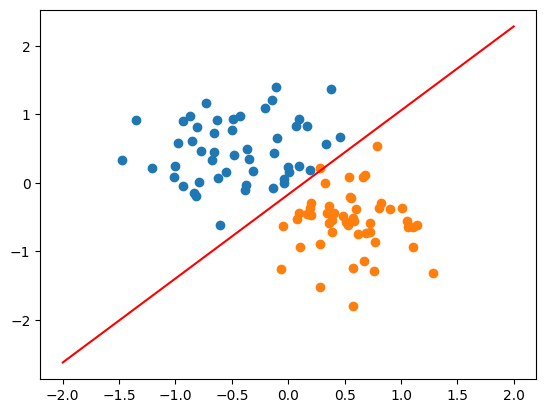

In [15]:
plot_fit('trained_model')

## model testing

red point prob: 0.9999686479568481
black point prob: 5.659018825099338e-06

OR USING THE PREDICT FUNCTION:

red is in class: 1
black is in class: 0


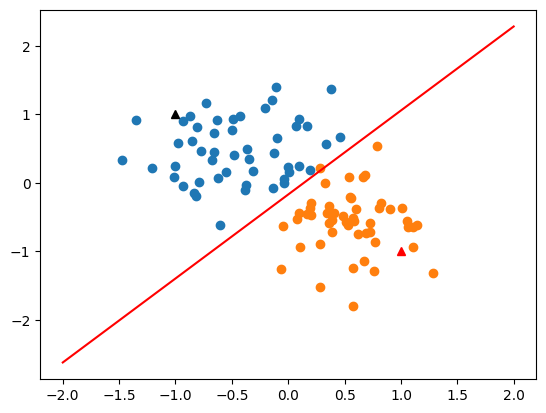

In [16]:
point1 = torch.Tensor([1.0,-1.0])
point2 = torch.Tensor([-1.0,1.0])

plt.plot(point1.numpy()[0],point1.numpy()[1],'r^')
plt.plot(point2.numpy()[0],point2.numpy()[1],'k^')

print('red point prob:', model.forward(point1).item())
print('black point prob:', model.forward(point2).item())

#Or using the predict function 
print('\nOR USING THE PREDICT FUNCTION:\n')

print('red is in class:',model.predict(point1))
print('black is in class:',model.predict(point2))

plot_fit('trained_model')

## Non-Linear classification

In [17]:
n_pts=500
centers=[[-0.5,0.5],[0.5,-0.5]]
x,y = datasets.make_circles(n_samples= n_pts, random_state=123,noise=0.1,factor=0.2)
x_data = torch.Tensor(x)
y_data = torch.Tensor(y)


In [18]:
def scatter_plot():
  plt.scatter(x[y==0, 0],x[y==0,1])
  plt.scatter(x[y==1, 0],x[y==1,1])

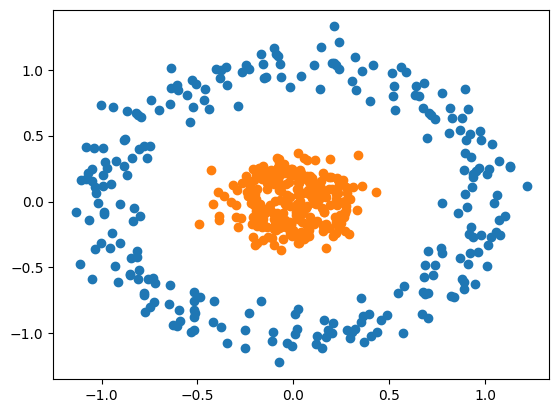

In [19]:
scatter_plot()

In [20]:
class Model_circle(nn.Module):
  def __init__(self,input_size, hidden_size, output_size):
    super().__init__()
    self.linear  = nn.Linear(input_size,hidden_size)
    self.linear2 = nn.Linear(hidden_size,output_size)
  def forward(self,x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [21]:
torch.manual_seed(2)
model=Model_circle(2,4,1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683],
         [ 0.1939, -0.0361],
         [ 0.3021,  0.1683],
         [-0.0813, -0.5717]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True),
 Parameter containing:
 tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True),
 Parameter containing:
 tensor([0.2116], requires_grad=True)]

In [22]:
criterion= nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [23]:
epochs=1000
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_data)
  y_pred=y_pred.squeeze()
  loss=criterion(y_pred,y_data)
  print('epochs:',i,'loss: ', loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epochs: 0 loss:  0.7148520350456238
epochs: 1 loss:  0.6947316527366638
epochs: 2 loss:  0.6955162286758423
epochs: 3 loss:  0.7014890909194946
epochs: 4 loss:  0.7013982534408569
epochs: 5 loss:  0.697470486164093
epochs: 6 loss:  0.693925678730011
epochs: 7 loss:  0.6928598284721375
epochs: 8 loss:  0.6939383149147034
epochs: 9 loss:  0.6954388618469238
epochs: 10 loss:  0.6958757042884827
epochs: 11 loss:  0.6949177384376526
epochs: 12 loss:  0.6931492686271667
epochs: 13 loss:  0.691389799118042
epochs: 14 loss:  0.6901613473892212
epochs: 15 loss:  0.6894590258598328
epochs: 16 loss:  0.688843309879303
epochs: 17 loss:  0.687766969203949
epochs: 18 loss:  0.6859007477760315
epochs: 19 loss:  0.6832481622695923
epochs: 20 loss:  0.6800420880317688
epochs: 21 loss:  0.6765591502189636
epochs: 22 loss:  0.6729681491851807
epochs: 23 loss:  0.6692697405815125
epochs: 24 loss:  0.6653286218643188
epochs: 25 loss:  0.6609662771224976
epochs: 26 loss:  0.6560585498809814
epochs: 27 loss:

Text(0.5, 0, 'epoch')

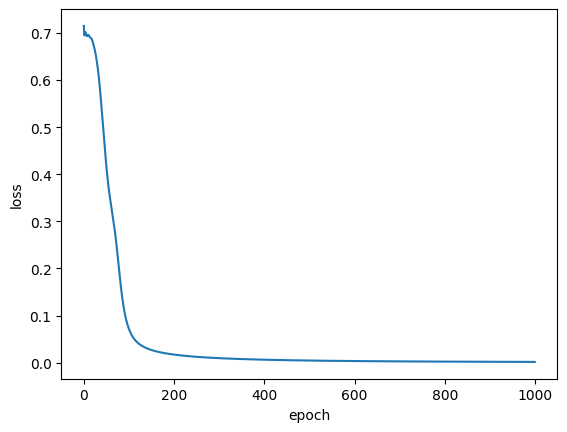

In [24]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [25]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

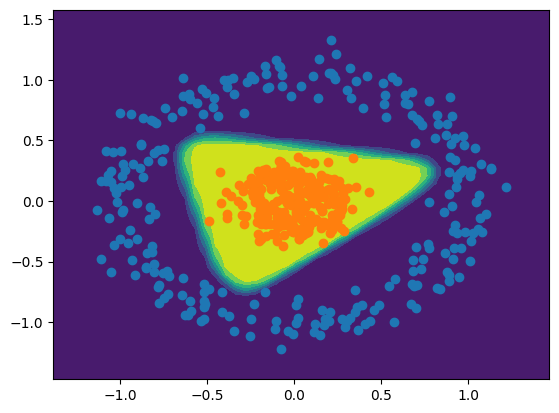

In [26]:
plot_decision_boundary(x, y)
scatter_plot()
     

Prediction is 1


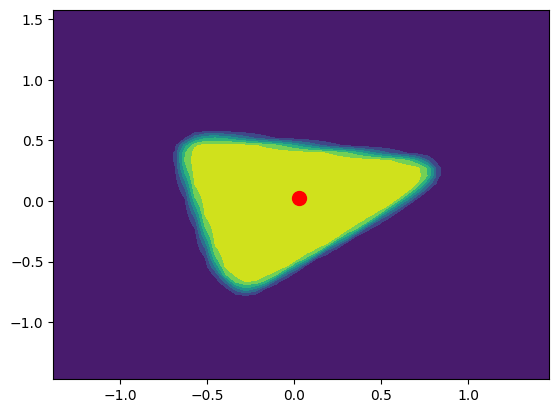

In [27]:
a = 0.025
b = 0.025
point = torch.Tensor([a, b])
prediction = model.predict(point)
plt.plot([a], [b], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(x, y)